In [1]:
import numpy as np
import pandas as pd
from scipy.stats import binom_test

def simulation_binomial_test(observed_successes, n, p, alternative_hypothesis):
    #initialize null_outcomes
    null_outcomes = []

    #generate the simulated null distribution
    for i in range(10000):
        simulated_monthly_visitors = np.random.choice(['y', 'n'], size=n, p=[p, 1-p])
        num_purchased = np.sum(simulated_monthly_visitors == 'y')
        null_outcomes.append(num_purchased)

    null_outcomes = np.array(null_outcomes)

    if alternative_hypothesis == 'less':
        p_value = np.sum(null_outcomes <= observed_successes)/len(null_outcomes)
    elif alternative_hypothesis == 'greater':
        p_value = np.sum(null_outcomes >= observed_successes)/len(null_outcomes)
    else:
        difference = np.abs(p*n - observed_successes)
        upper = p*n + difference
        lower = p*n - difference
        p_value = np.sum((null_outcomes >= upper) | (null_outcomes <= lower))/len(null_outcomes)

    #return the p-value
    return p_value

In [8]:
#Test your function:
print('lower tail one-sided test:')
p_value1 = simulation_binomial_test(45, 500, .1, alternative_hypothesis = 'less')

print("simulation p-value: ", p_value1)
p_value2 = binom_test(45, 500, .1, alternative = 'less')
print("binom_test p-value: ", p_value2)

lower tail one-sided test:
simulation p-value:  0.2588
binom_test p-value:  0.254689260562342


In [9]:
print('upper tail one-sided test:')
p_value1 = simulation_binomial_test(53, 500, .1, alternative_hypothesis = 'greater')

print("simulation p-value: ", p_value1)
p_value2 = binom_test(53, 500, .1, alternative = 'greater')
print("binom_test p-value: ", p_value2)

upper tail one-sided test:
simulation p-value:  0.3506
binom_test p-value:  0.34838119949983115


In [10]:
print('two-sided test:')
p_value1 = simulation_binomial_test(42, 500, .1, alternative_hypothesis = 'not_equal')

print("simulation p-value: ", p_value1)
p_value2 = binom_test(42, 500, .1)
print("binom_test p-value: ", p_value2)

two-sided test:
simulation p-value:  0.2655
binom_test p-value:  0.2631383468731764


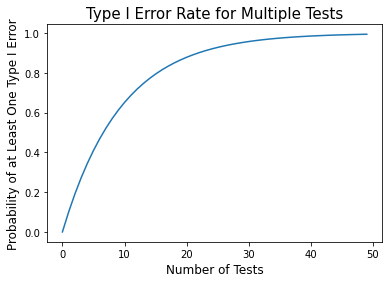

In [11]:
# The false positive probability

# Import libraries
import matplotlib.pyplot as plt

# Set a correct value for num_tests_50percent
num_tests_50percent = 15


# Create the plot
sig_threshold = 0.10
num_tests = np.array(range(50))
probabilities = 1-((1-sig_threshold)**num_tests)
plt.plot(num_tests, probabilities)

# Edit title and axis labels
plt.title('Type I Error Rate for Multiple Tests', fontsize=15)
# Label the y-axis
plt.ylabel('Probability of at Least One Type I Error', fontsize=12)
# Label the x-axis
plt.xlabel('Number of Tests', fontsize=12)

# Show the plot
plt.show()